# TwoSix Project Demo and Figure Reproducability 

This notebook outlines the steps for generating a PHATE visualization, following the rough pipeline used by our team for analysis and visualization. It serves as a demo for loading sample data and producing a simple figure. The only difference between this demo and the team’s full workflow is that the data collection process has been skipped for simplicity, as it is more complex. For more details on data collection, refer to the README.md in the GitHub repository.

## 1. Load Packages and Data 

In [20]:
import numpy as np
import pandas as pd
import phate
import matplotlib.pyplot as plt
import seaborn as sns
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer

In [21]:
# Load the sample dataset – this is real scraped and cleaned data prepared by the team for this demo
data = pd.read_csv("clean_data.csv",header=0,low_memory=False)

In [22]:
# Sample some data to ensure fast runtime on local machine
idx = np.random.randint(0,40000,1000)

In [23]:
# View the data
data.head()

,Document ID,Agency ID,Docket ID,Tracking Number,Document Type,Posted Date,Is Withdrawn?,Federal Register Number,Title,Comment Start Date,...,Comment on Document ID,Received Date,CFR,Document Subtype,Start End Page,Government Agency,Government Agency Type,Comment,Content Files,Attachment Files
0,FS-2023-0006-0002,FS,FS-2023-0006,NaN,Proposed Rule,2023-04-21T04:00Z,False,2023-08429,Forest Service Functions,2023-04-21T04:00Z,...,NaN,2023-04-21T04:00Z,36 CFR Part 200,Advance Notice of Proposed Rulemaking (ANPRM),24497 - 24503,NaN,NaN,NaN,https://downloads.regulations.gov/FS-2023-0006...,NaN
1,FS-2023-0006-0003,FS,FS-2023-0006,lgr-1foi-blth,Public Submission,2023-05-18T04:00Z,False,NaN,Comment on FR Doc # 2023-08429,NaN,...,FS-2023-0006-0002,2023-04-21T04:00Z,NaN,NaN,NaN,NaN,NaN,I strongly support and greatly appreciate this...,NaN,https://downloads.regulations.gov/FS-2023-0006...
2,FS-2023-0006-0004,FS,FS-2023-0006,lgr-1hw4-0sy1,Public Submission,2023-05-18T04:00Z,False,NaN,Comment on FR Doc # 2023-08429,NaN,...,FS-2023-0006-0002,2023-04-21T04:00Z,NaN,NaN,NaN,NaN,NaN,Please see the attachment.,NaN,https://downloads.regulations.gov/FS-2023-0006...
3,FS-2023-0006-0005,FS,FS-2023-0006,lgw-zcov-qonu,Public Submission,2023-05-18T04:00Z,False,NaN,Comment on FR Doc # 2023-08429,NaN,...,FS-2023-0006-0002,2023-04-25T04:00Z,NaN,NaN,NaN,NaN,NaN,i recommend the forest service create more wil...,NaN,NaN
4,FS-2023-0006-0006,FS,FS-2023-0006,lgz-3ked-z3xd,Public Submission,2023-05-18T04:00Z,False,NaN,Comment on FR Doc # 2023-08429,NaN,...,FS-2023-0006-0002,2023-04-27T04:00Z,NaN,NaN,NaN,NaN,NaN,Old-growth forests have more value left alone ...,NaN,NaN


In [24]:
# Take a sample of the data
df = data.iloc[idx,:]

In [25]:
# Get the comment data
docs = list(df["Comment"])

## 2. Topic Modeling

In [26]:
# Define a custom list of stopwords to exclude common and domain-specific terms from topic modeling

custom_stopwords = ["climate","trees", "forests" "change", "policy", "government", "regulation", "law", 
                    "to", "the", "and", "of", "in", "for", "on", "at", "is", "are"]

# Initialize a CountVectorizer with the custom stopwords and an n-gram range of (1,3) for capturing single words, 
# bigrams, and trigrams in the text data
vectorizer = CountVectorizer(stop_words=custom_stopwords, ngram_range=(1, 3))


In [27]:
# Initialize the BERTopic model with a BERT-based embedding model and custom parameters

topic_model = BERTopic(
    language="english",
    top_n_words=5,
    n_gram_range=(1, 3),
    min_topic_size=20,
    calculate_probabilities=True,
    zeroshot_min_similarity=0.8,
    embedding_model="all-MiniLM-L6-v2",
    vectorizer_model=CountVectorizer(stop_words="english", ngram_range=(1, 3)),
    representation_model="KeyBERTInspired",
    verbose=True
)


In [28]:
# Fit the topic model to the documents and obtain assigned topics and their probabilities
topics, probs = topic_model.fit_transform(docs)

2025-03-29 17:21:56,289 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2025-03-29 17:22:02,126 - BERTopic - Embedding - Completed ✓
2025-03-29 17:22:02,126 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-29 17:22:04,733 - BERTopic - Dimensionality - Completed ✓
2025-03-29 17:22:04,734 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-29 17:22:04,788 - BERTopic - Cluster - Completed ✓
2025-03-29 17:22:04,791 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-29 17:22:05,019 - BERTopic - Representation - Completed ✓


In [29]:
# Retrieve summary information about the extracted topics, including topic IDs, sizes, and representative words
topic_info = topic_model.get_topic_info()

# Generate human-readable labels for each topic based on representative words
topic_labels = topic_model.generate_topic_labels()

In [30]:
# view the topic labels 
topic_labels

['0_trees_climate_lands',
 '1_trees_lands_mature',
 '2_forests_climate_communities',
 '3_forests_old_growth',
 '4_forest_forests_older forests']

In [31]:
# Create a dictionary mapping each topic ID to its corresponding name  
topic_dict = {row["Topic"]: row["Name"] for _, row in topic_info.iterrows()}

# Assign human-readable topic labels to documents based on their assigned topics;  
# if a document's topic is not in the dictionary, label it as "Outlier"
document_labels = [topic_dict[topic] if topic in topic_dict else "Outlier" for topic in topics]

In [32]:
# Initialize the SentenceTransformer with the pre-trained "all-MiniLM-L6-v2" model for generating document embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Encode the list of documents into embeddings, with a progress bar to show the process
doc_embeddings = embedding_model.encode(list(docs), show_progress_bar=True)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

## 3. Visualization

In [33]:
# Initialize the PHATE operator for dimensionality reduction with 2 components
phate_operator = phate.PHATE(n_components=2)

# Apply the PHATE dimensionality reduction to the document embeddings, resulting in a 2D representation
phate_embedding = phate_operator.fit_transform(doc_embeddings)

Calculating PHATE...
  Running PHATE on 1000 observations and 384 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.05 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.05 seconds.
    Calculating affinities...
    Calculated affinities in 0.16 seconds.
  Calculated graph and diffusion operator in 0.26 seconds.
  Calculating optimal t...


/Users/ethandemott/opt/anaconda3/envs/CMSE495-TwoSix/lib/python3.11/site-packages/graphtools/graphs.py:290: RuntimeWarning:

Detected zero distance between 16442 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.

/Users/ethandemott/opt/anaconda3/envs/CMSE495-TwoSix/lib/python3.11/site-packages/graphtools/graphs.py:454: RuntimeWarning:

overflow encountered in power

/Users/ethandemott/opt/anaconda3/envs/CMSE495-TwoSix/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning:

K should have a non-zero diagonal



    Automatically selected t = 11
  Calculated optimal t in 1.16 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.19 seconds.
  Calculating metric MDS...
    Using SMACOF because SGD returned NaN
  Calculated metric MDS in 2.06 seconds.
Calculated PHATE in 3.68 seconds.


In [34]:
# Create a DataFrame containing the 2D PHATE embeddings and their corresponding topic labels
df = pd.DataFrame({
    "PHATE_1": phate_embedding[:, 0],  # First component of the PHATE embedding (x-axis)
    "PHATE_2": phate_embedding[:, 1],  # Second component of the PHATE embedding (y-axis)
    "Topic": document_labels           # Assign corresponding topic labels to each document
})

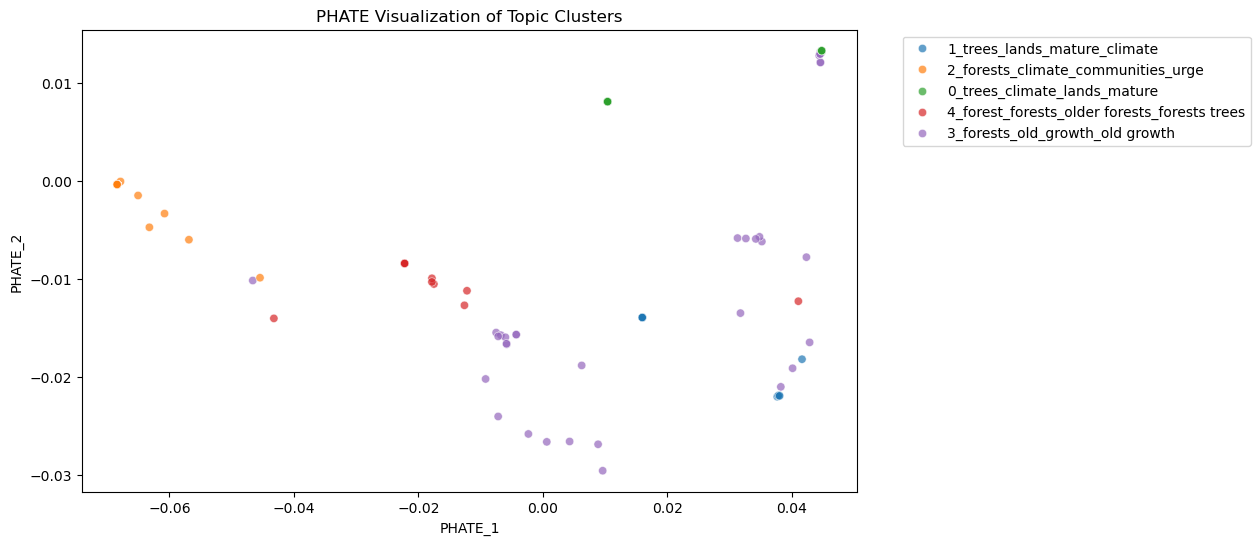

In [35]:
# Create a scatter plot to visualize the PHATE 2D embeddings, colored by the document topics

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PHATE_1", y="PHATE_2", hue="Topic", palette="tab10", alpha=0.7)
plt.title("PHATE Visualization of Topic Clusters")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("phate_visualization.png", dpi=300, bbox_inches="tight")
plt.show()

In [36]:
# Generate a bar chart visualization for the top 10 topics, showing the most representative words for each

topic_model.visualize_barchart(top_n_topics=10)